In [1]:
#importing Libraries
import pandas as pd #It's used for analysis the data
import numpy as np #That's stands for Numerical_python and used to calculate scientefic math calculation
import seaborn as sns #It's used for statistical ploting
import matplotlib.pyplot as plt
% matplotlib inline
import math
from sklearn import tree, metrics, model_selection, preprocessing
titanic_data = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
print("# of passengers in original data: " +str(len(titanic_data.index)))

# of passengers in original data: 891


#Analysing Data

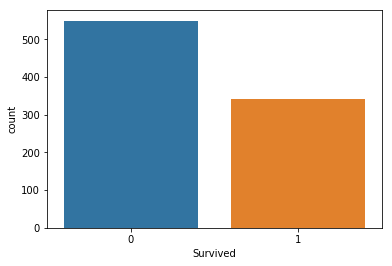

In [3]:
sns.countplot(x="Survived", data = titanic_data)

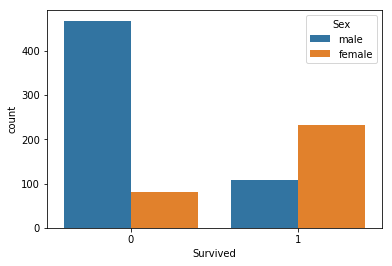

In [4]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

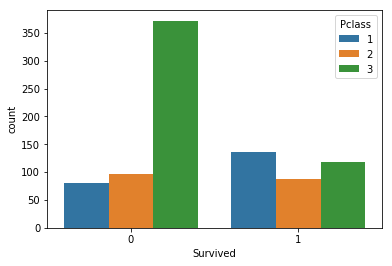

In [5]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

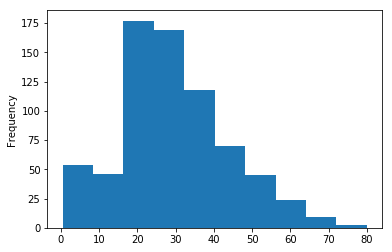

In [6]:
titanic_data["Age"].plot.hist()

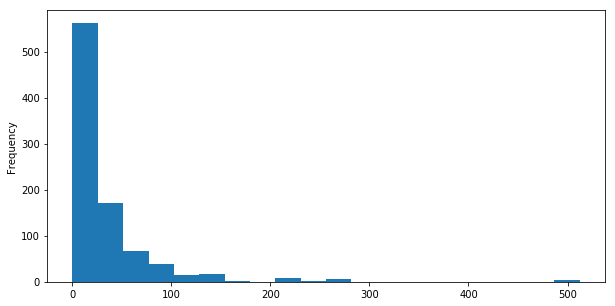

In [7]:
titanic_data["Fare"].plot.hist(bins = 20, figsize=(10,5))

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


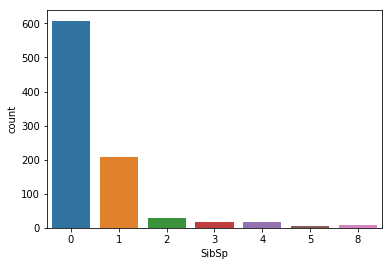

In [9]:
sns.countplot(x="SibSp", data=titanic_data)

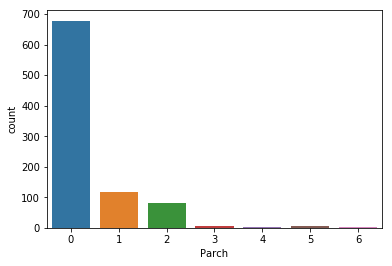

In [10]:
sns.countplot(x="Parch", data=titanic_data)

##Data Wrangling

In [11]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


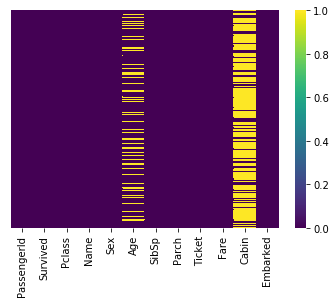

In [14]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap = 'viridis')

In [15]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
titanic_data.dropna(inplace=True)

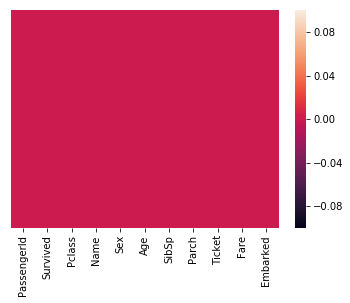

In [19]:
sns.heatmap(titanic_data.isnull(), yticklabels = False)

In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
titanic_data.drop(["PassengerId", "Name", "Embarked", "Ticket",],axis=1,inplace=True)

In [23]:
titanic_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [24]:
titanic_data['Sex_label'], _ = pd.factorize(titanic_data['Sex'])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_label
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,1
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


Train Data

In [25]:
X = titanic_data.drop(["Survived","Sex"],axis=1)
print(X)
y = titanic_data[['Survived']]

     Pclass   Age  SibSp  Parch      Fare  Sex_label
0         3  22.0      1      0    7.2500          0
1         1  38.0      1      0   71.2833          1
2         3  26.0      0      0    7.9250          1
3         1  35.0      1      0   53.1000          1
4         3  35.0      0      0    8.0500          0
6         1  54.0      0      0   51.8625          0
7         3   2.0      3      1   21.0750          0
8         3  27.0      0      2   11.1333          1
9         2  14.0      1      0   30.0708          1
10        3   4.0      1      1   16.7000          1
11        1  58.0      0      0   26.5500          1
12        3  20.0      0      0    8.0500          0
13        3  39.0      1      5   31.2750          0
14        3  14.0      0      0    7.8542          1
15        2  55.0      0      0   16.0000          1
16        3   2.0      4      1   29.1250          0
18        3  31.0      1      0   18.0000          1
20        2  35.0      0      0   26.0000     

In [26]:
from sklearn.cross_validation import train_test_split

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [28]:
from sklearn import tree, metrics, model_selection, preprocessing

In [29]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
y_pred = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       0.82      0.84      0.83       126\n          1       0.76      0.73      0.74        88\n\navg / total       0.79      0.79      0.79       214\n'

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, y_pred)

array([[106,  20],
       [ 24,  64]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)*100

79.43925233644859